In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os

From the data that was gathered, we first make sure there are not a considerable amount of hot pixels. To do this, we look at the dark images which were captured by taking exposures with the cap cover over the CCD camera. The flat field images are more akin to exposures of the ambient light in the room than true flat field images.

Because 5 exposures were taken for each dataset, the "Master" dataset is the mean of all 5 images.

In [15]:
# Define the folder paths
dark_path    = 'data\darks'
flat_path    = 'data\\flats'
cleaned_path = 'data\cleaned_beam'

# List all CSV files in the folder
dark_files    = [f for f in os.listdir(dark_path) if f.endswith('.csv')]
flat_files    = [f for f in os.listdir(flat_path) if f.endswith('.csv')]
cleaned_files = [f for f in os.listdir(cleaned_path) if f.endswith('.csv')]

# Load all CSV files into a list of dataframes
dark_data    = [np.loadtxt(os.path.join(dark_path, file), delimiter=';') for file in dark_files]
flat_data    = [np.loadtxt(os.path.join(flat_path, file), delimiter=';') for file in flat_files]
cleaned_data = [np.loadtxt(os.path.join(cleaned_path, file), delimiter=';') for file in cleaned_files]

In [16]:
# Calculates the master dark, flat and cleaned beam
# by taking the mean of all the measurements
master_dark          = np.mean(dark_data, axis=0)
master_flat          = np.mean(flat_data, axis=0)
master_filtered_beam = np.mean(cleaned_data, axis=0)

Text(0.5, 1.0, 'Master Dark')

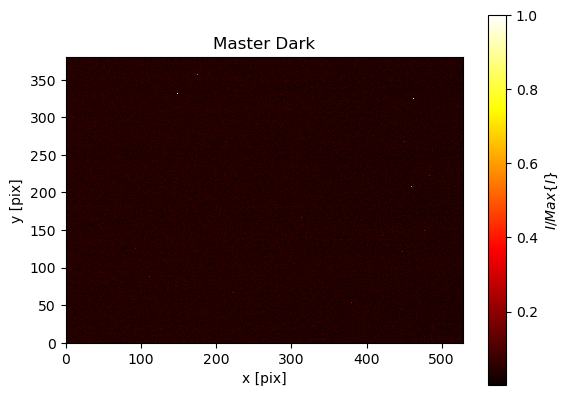

In [17]:
# Plots the master dark
fig,ax = plt.subplots()
ax.pcolormesh(master_dark / np.max(master_dark), label='Master Dark', cmap = 'hot')
ax.set_xlabel('x [pix]')
ax.set_ylabel('y [pix]')

# Sets a colourbar
cbar = plt.colorbar(ax.pcolormesh(master_dark / np.max(master_dark), cmap = 'hot'))
# cbar = plt.colorbar(ax.pcolormesh(master_dark, cmap = 'hot'))
cbar.set_label('$I/Max\{I\}$')
ax.set_aspect('equal')
ax.set_title('Master Dark')

Text(0.5, 1.0, 'Master Flat')

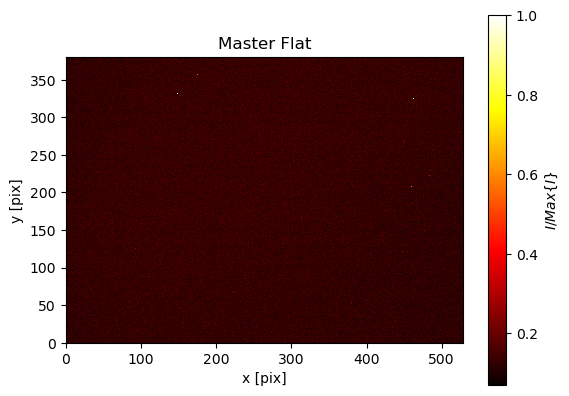

In [18]:
# Plots the flat field
fig,ax = plt.subplots()
ax.pcolormesh(master_flat / np.max(master_flat), label='Master filtered beam', cmap = 'hot')
ax.set_xlabel('x [pix]')
ax.set_ylabel('y [pix]')

# Sets a colourbar
cbar = plt.colorbar(ax.pcolormesh(master_flat / np.max(master_flat), cmap = 'hot'))
# cbar = plt.colorbar(ax.pcolormesh(master_flat, cmap = 'hot'))

cbar.set_label('$I/Max\{I\}$')
ax.set_aspect('equal')
ax.set_title('Master Flat')

Text(0.5, 1.0, 'Master Filtered Beam')

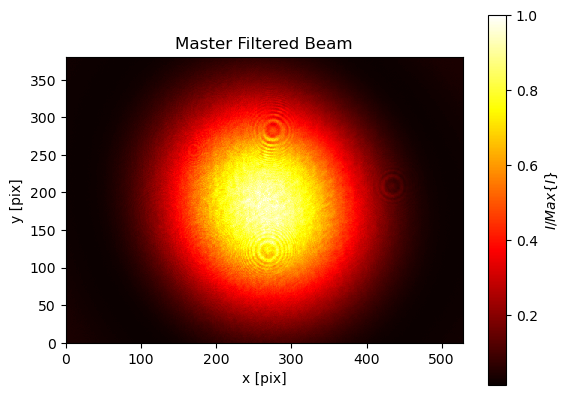

In [19]:
# Plots the master filtered beam
fig,ax = plt.subplots()
ax.pcolormesh(master_filtered_beam / np.max(master_filtered_beam), label='Master Flat', cmap = 'hot')
ax.set_xlabel('x [pix]')
ax.set_ylabel('y [pix]')

# Sets a colourbar
cbar = plt.colorbar(ax.pcolormesh(master_filtered_beam / np.max(master_filtered_beam), cmap = 'hot'))
# cbar = plt.colorbar(ax.pcolormesh(master_flat, cmap = 'hot'))

cbar.set_label('$I/Max\{I\}$')
ax.set_aspect('equal')
ax.set_title('Master Filtered Beam')

We do see a couple of hot pixels, but not enough to be of any concern. The master data is saved here for use in the analysis.

In [20]:
# Saves the master data to the master_data folder
np.savetxt('data\master_data\master_dark.csv', master_dark, delimiter=',')
np.savetxt('data\master_data\master_flat.csv', master_flat, delimiter=',')
np.savetxt('data\master_data\master_filtered_beam.csv', master_filtered_beam, delimiter=',')